## Install

``` shell
conda create python=2.7 h5py jupyter -p ~/space/envs/peaknet
conda install pytorch=0.1.12 torchvision cuda80 -c pytorch
conda install tensorboardX
```


### Import packages

In [1]:
%load_ext autoreload
%autoreload 2
import torch
import torchvision
import numpy as np
import time
from peaknet import Peaknet
from peaknet_utils import *

/reg/neh/home/liponan/space/envs/peaknet/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Load data from CXI

In [2]:
filename = "/reg/neh/home/liponan/data/cxic0415/r0091/cxic0415_0091.cxi.backup"
idx=468
imgs, labels = imgs, labels = load_from_cxi( filename, idx )
print("imgs", imgs.shape)
print("labels", len(labels), len(labels[0]))

('imgs', (1, 32, 185, 388))
('labels', 6, 454)


### Init. network

In [3]:
net = Peaknet()
net.loadCfg( "../pytorch-yolo2/cfg/newpeaksv10-asic.cfg" )
# net.init_model()
net.loadWeights( "../pytorch-yolo2/cfg/newpeaksv10-asic.cfg", 
                "../darknet/backup/newpeaksv10_10000.weights")
net.model.cuda()

Darknet (
  (models): ModuleList (
    (0): Sequential (
      (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
      (leaky1): LeakyReLU (0.1, inplace)
    )
    (1): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (2): Sequential (
      (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (leaky2): LeakyReLU (0.1, inplace)
    )
    (3): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (4): Sequential (
      (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
      (leaky3): LeakyReLU (0.1, inplace)
    )
    (5): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (6): Sequential (
      (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(

### Predict

In [4]:
results = net.predict( imgs, batch_size=32, conf_thresh=0.25, use_cuda=True )

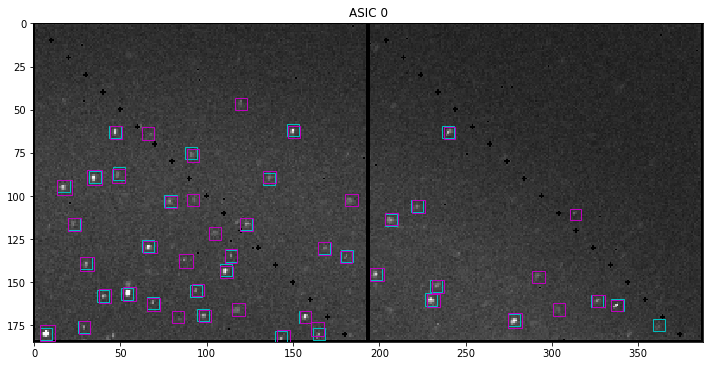

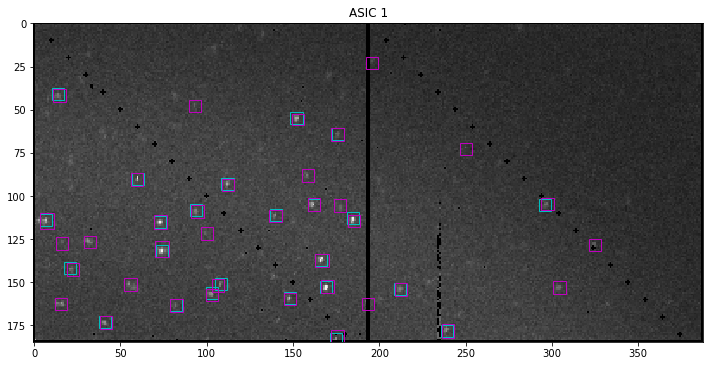

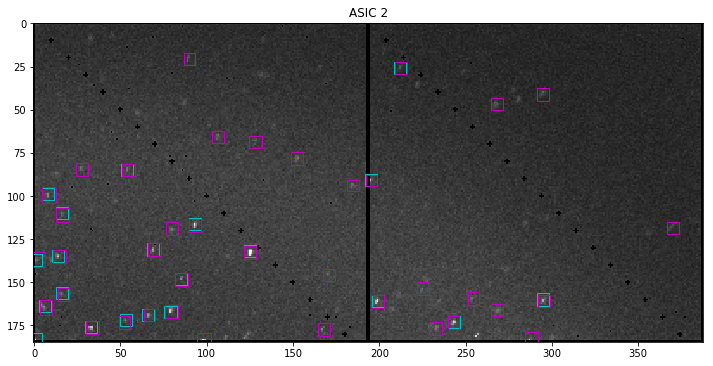

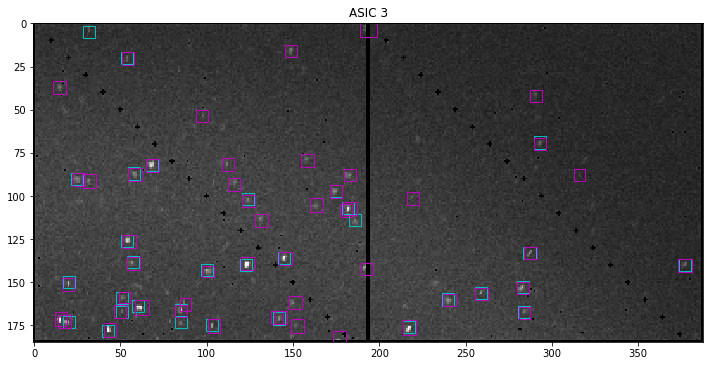

In [5]:
visualize(imgs, labels, results, plot_label=True, plot_box=True, indexes=[0, 1, 2, 3])

In [3]:
filename = "/reg/neh/home/liponan/data/cxic0415/r0091/cxic0415_0091.cxi.backup"
t0 = time.time()
train_imgs, train_labels, dev_imgs, dev_labels = build_dataset( filename, dev_size = 10, total_size=110 )
t1 = time.time()
print("took " + str(t1-t0) + " s to build the datasets")
print("train_imgs", train_imgs.shape)
print("train_labels", len(train_labels), len(train_labels[0]))
print("dev_imgs", dev_imgs.shape)
print("dev_labels", len(dev_labels), len(dev_labels[0]))

hits: 1325
took 14.469506979 s to build the datasets
('train_imgs', (100, 32, 185, 388))
('train_labels', 100, 6)
('dev_imgs', (10, 32, 185, 388))
('dev_labels', 10, 6)


In [4]:
project_name = "runs/adagrad_lr001"
n_ep = 10
init_lr = 0.01
macro_batch_size = 2



params = {"n_ep":n_ep, "lr": init_lr, "batch_size":macro_batch_size}

net = Peaknet()
net.set_writer(project_name=project_name, parameters=params)
net.loadCfg( "../pytorch-yolo2/cfg/newpeaksv10-asic.cfg" )
net.init_model()
net.model.cuda()

Darknet (
  (models): ModuleList (
    (0): Sequential (
      (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
      (leaky1): LeakyReLU (0.1, inplace)
    )
    (1): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (2): Sequential (
      (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (leaky2): LeakyReLU (0.1, inplace)
    )
    (3): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (4): Sequential (
      (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
      (leaky3): LeakyReLU (0.1, inplace)
    )
    (5): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (6): Sequential (
      (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(

In [ ]:
n_iters = int( np.ceil( len(train_labels) / float(macro_batch_size) ) )

for ep in range(1, n_ep+1):
    print("============= EPOCH {} ==========".format(ep))
    for i in range(n_iters):
        if i == (n_iters-1):
            batch_imgs = train_imgs[(i*macro_batch_size):,:,:,:]
            batch_labels = train_labels[(i*macro_batch_size):]
        else:
            batch_imgs = train_imgs[i*macro_batch_size:(i+1)*macro_batch_size,:,:,:]
            batch_labels = train_labels[i*macro_batch_size:(i+1)*macro_batch_size]
        net.train( batch_imgs, batch_labels, batch_size=32 )
        net.set_optimizer(adagrad=True, lr=init_lr )
        net.optimize()

============= EPOCH 1 ==========
32: nGT 23, recall 0, proposals 222, loss: x 2.040127, y 2.701002, w 3.174475, h 2.570437, conf 6115.734863, cls 0.000000, total 6126.220703
64: nGT 24, recall 1, proposals 224, loss: x 2.058043, y 2.031381, w 3.310789, h 2.080641, conf 6076.435059, cls 0.000000, total 6085.915527
